# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nurfadilah
- Email: dilahindah6@gmail.com
- Id Dicoding: nurfadilahti21a2

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Penjelasan:
1. Pandas dan Numpy → untuk manipulasi data dan perhitungan numerik.
2. Matplotlib.pyplot dan Seaborn → untuk visualisasi data.
3. StandardScaler → untuk standarisasi fitur agar perbandingan antar fitur menjadi adil.
4. train_test_split → untuk membagi data latih dan uji secara proporsional.
5. RandomForestClassifier → untuk membangun model machine learning.
6. classification_report, accuracy_score, confusion_matrix → untuk evaluasi performa model.

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('/content/drive/MyDrive/employee_data.csv')

## Data Understanding

 Menampilkan 5 Baris Pertama Data:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2



ℹ Informasi Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



 Statistik Deskriptif Fitur Kategorikal:


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054



 Cek Duplikasi Data:
Jumlah baris duplikat: 0

 Cek Konsistensi Format (Contoh: Kolom Bertipe Tanggal)

 Distribusi Kelas (Attrition):


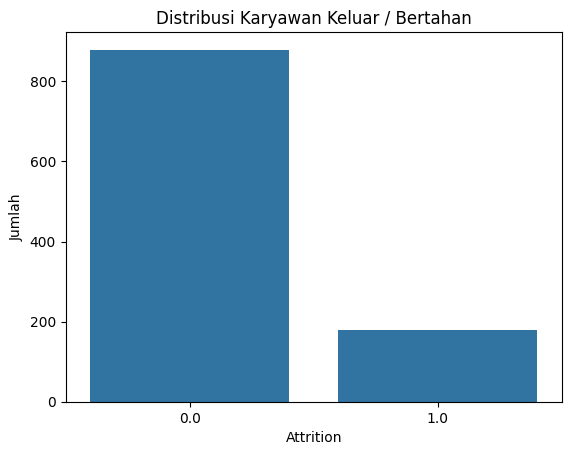


 Evaluasi Relevansi Fitur dan Potensi Kesalahan Input:
Kolom yang tersedia: ['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [4]:
print(" Menampilkan 5 Baris Pertama Data:")
display(df.head())

print("\nℹ Informasi Struktur Data:")
df.info()

print("\n Cek Nilai yang Hilang:")
print(df.isnull().sum())

print("\n Statistik Deskriptif Fitur Numerik:")
display(df.describe())

print("\n Statistik Deskriptif Fitur Kategorikal:")
display(df.describe(include='object'))

print("\n Cek Duplikasi Data:")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    display(duplicate_rows.head())

print("\n Cek Konsistensi Format (Contoh: Kolom Bertipe Tanggal)")

if 'HireDate' in df.columns:
    try:
        df['HireDate'] = pd.to_datetime(df['HireDate'])
        print("Format 'HireDate' berhasil dikonversi ke datetime.")
    except Exception as e:
        print(f"Kesalahan saat konversi tanggal: {e}")

print("\n Distribusi Kelas (Attrition):")
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Karyawan Keluar / Bertahan')
plt.xlabel('Attrition')
plt.ylabel('Jumlah')
plt.show()

print("\n Evaluasi Relevansi Fitur dan Potensi Kesalahan Input:")
print("Kolom yang tersedia:", df.columns.tolist())

In [5]:
df = df.dropna(subset=['Attrition'])
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

# EDA Sebelum Encoding


 Distribusi Numerikal:


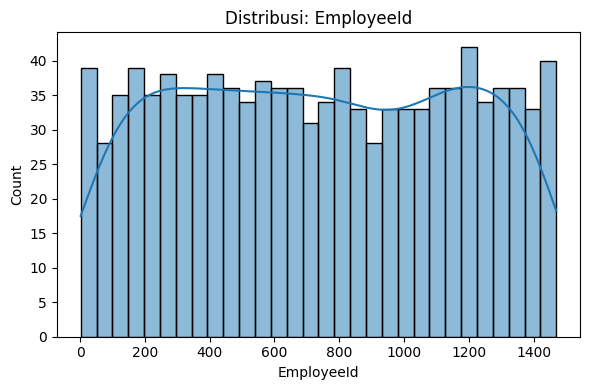

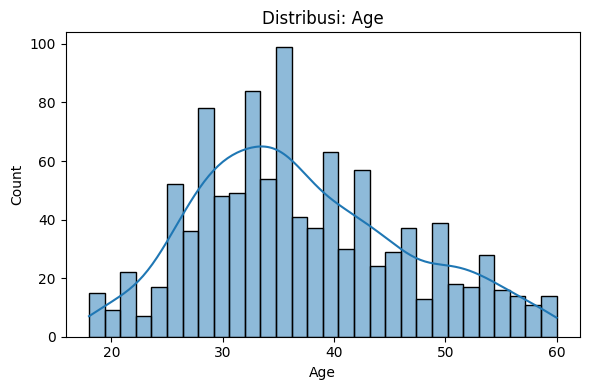

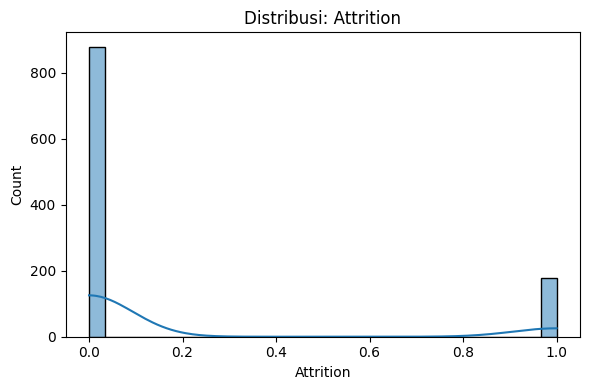

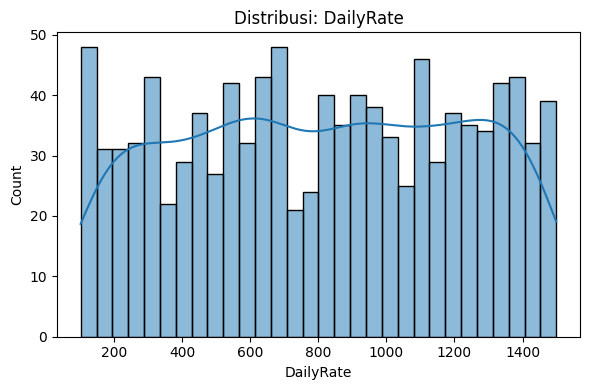

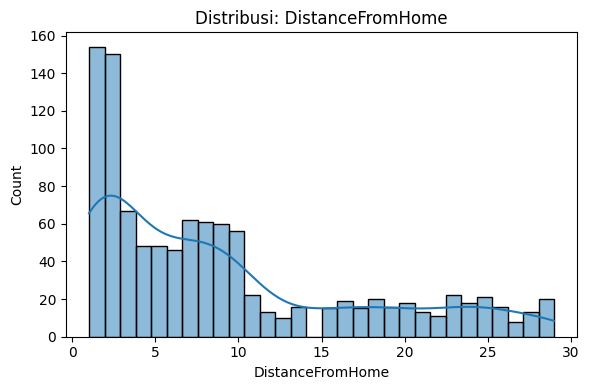

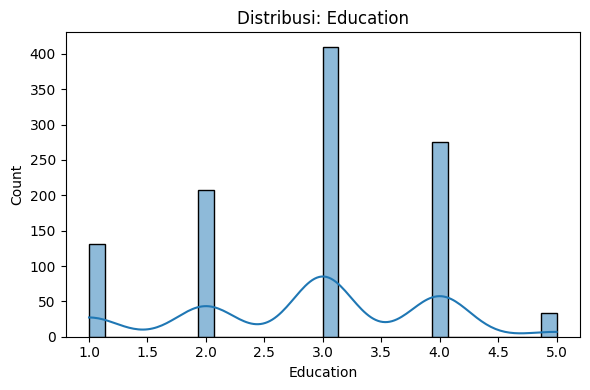

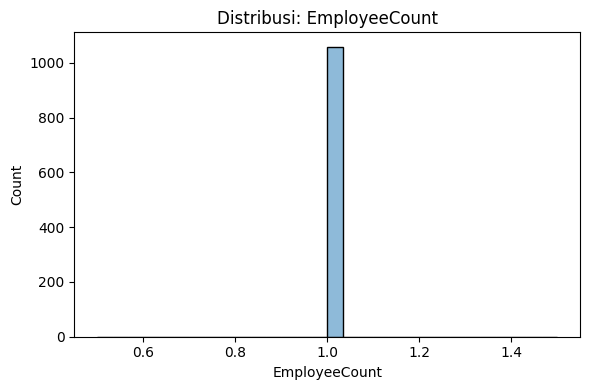

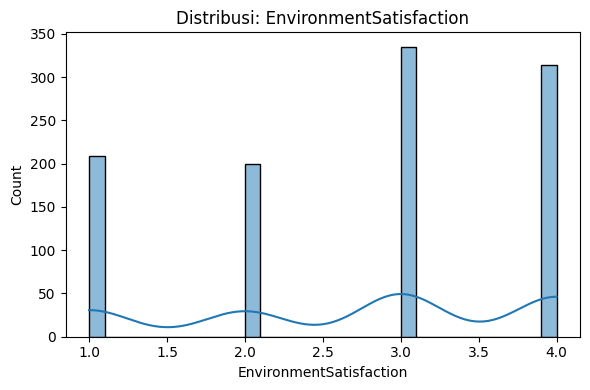

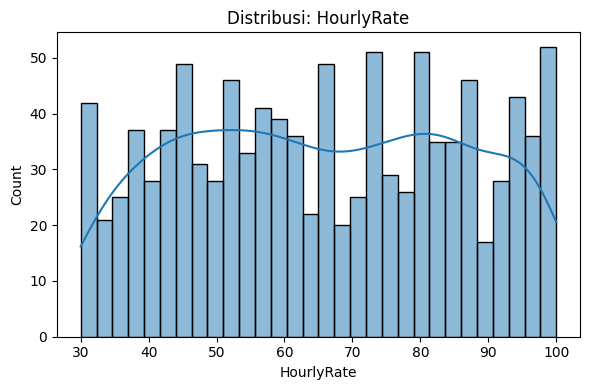

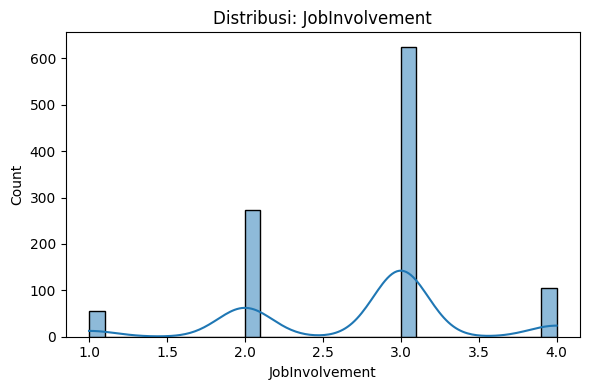

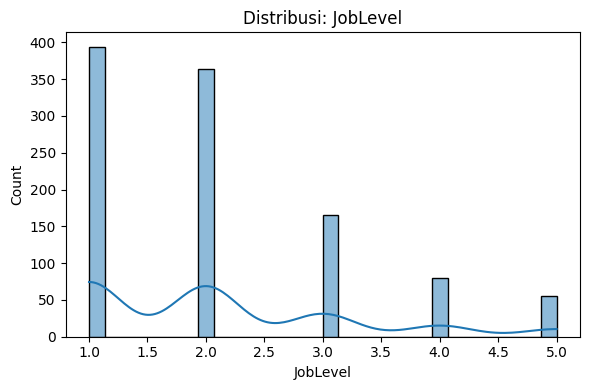

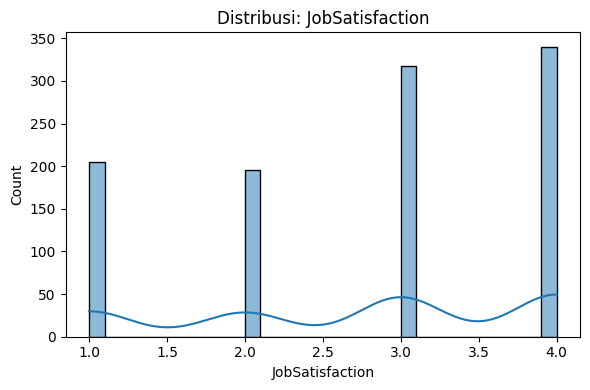

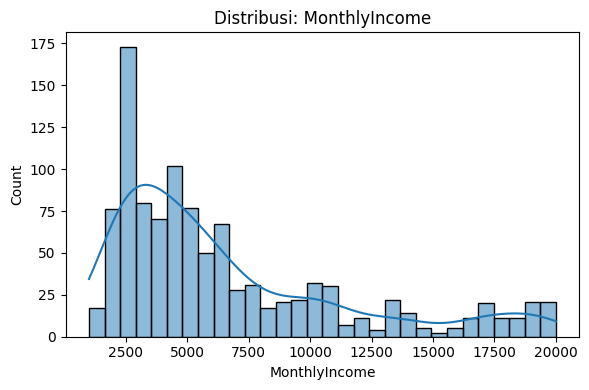

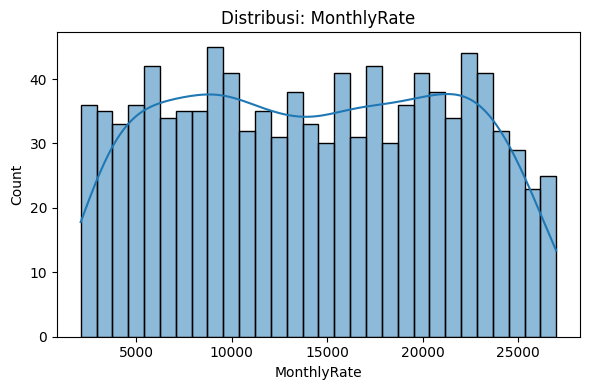

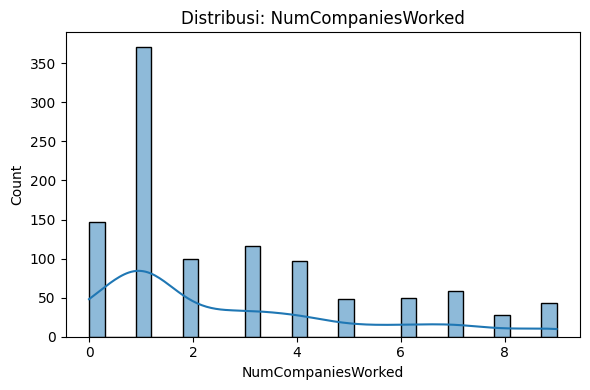

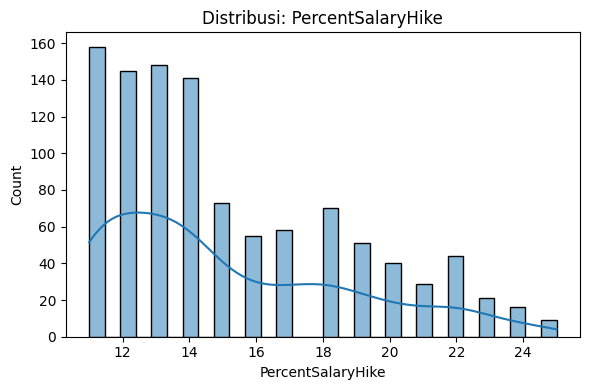

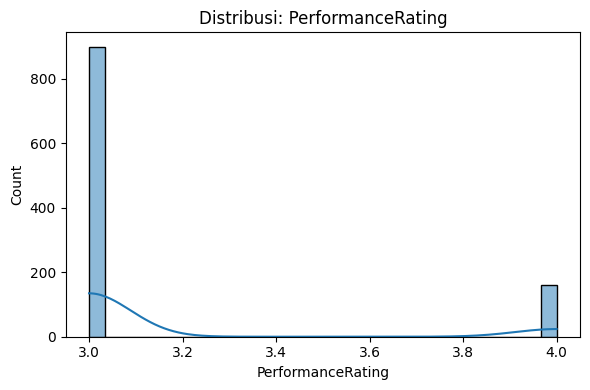

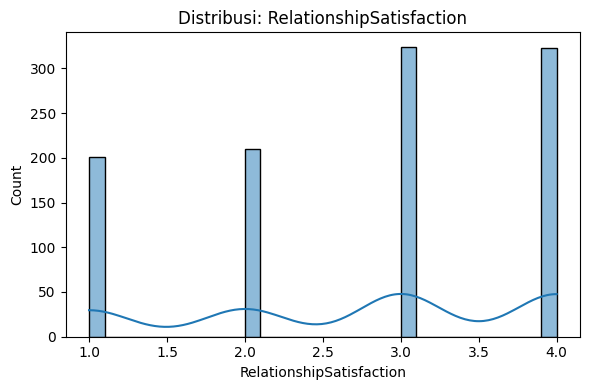

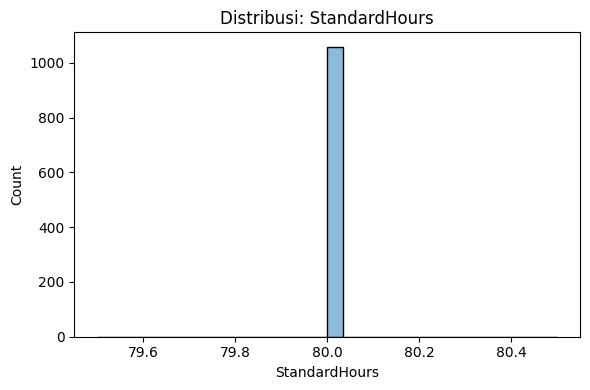

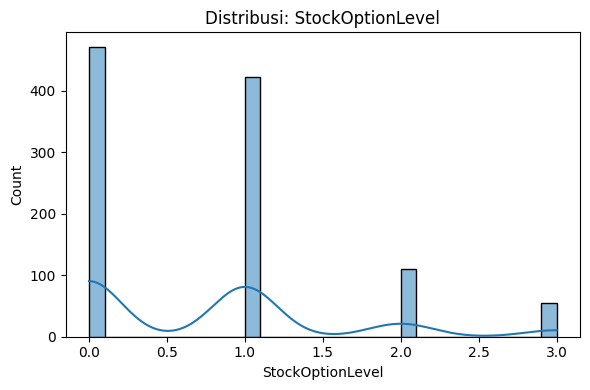

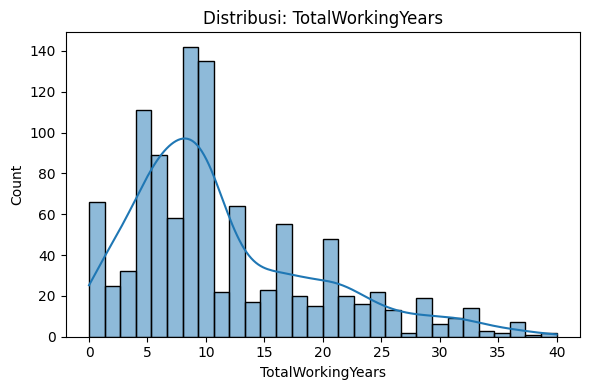

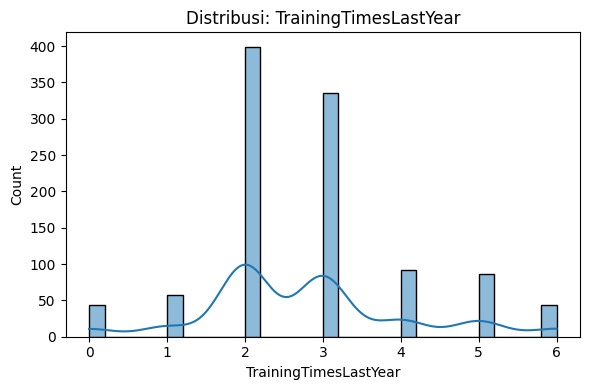

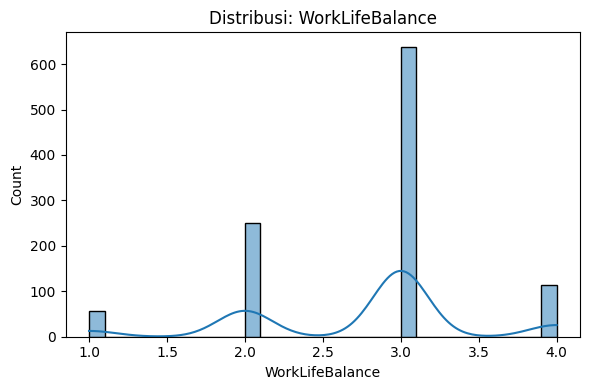

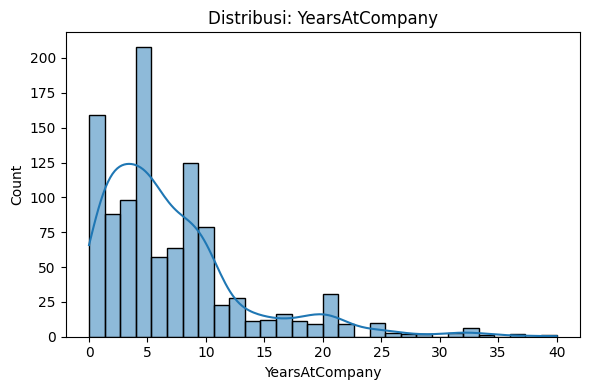

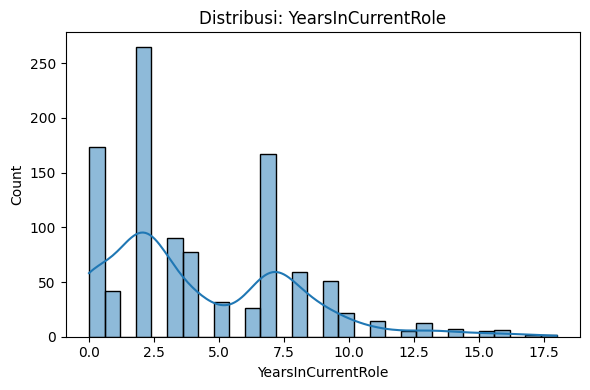

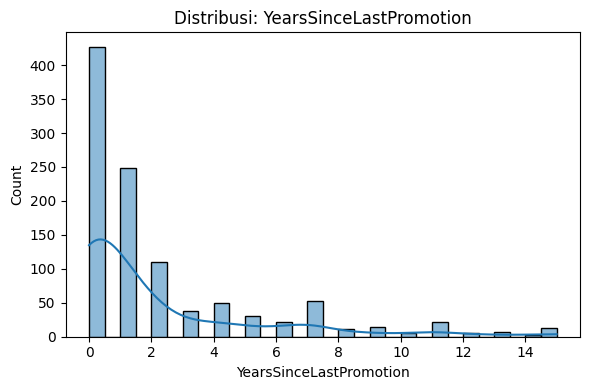

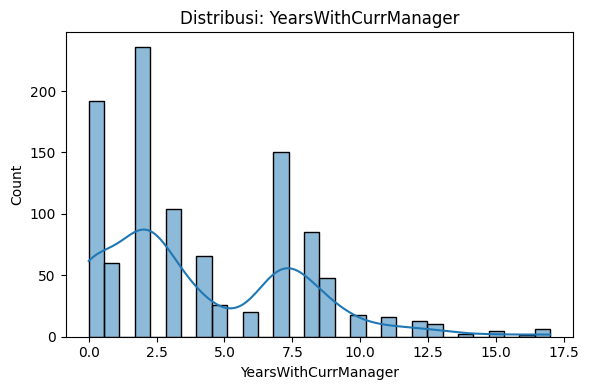


 Distribusi Kategorikal:


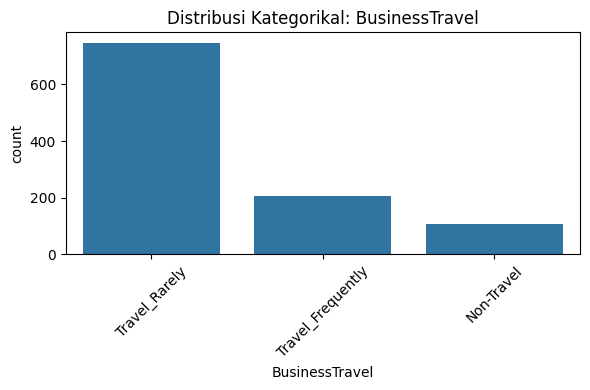

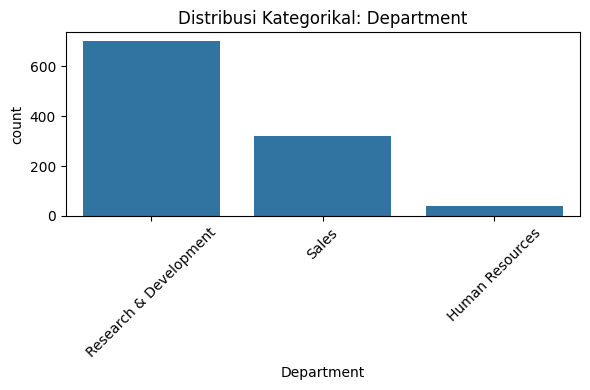

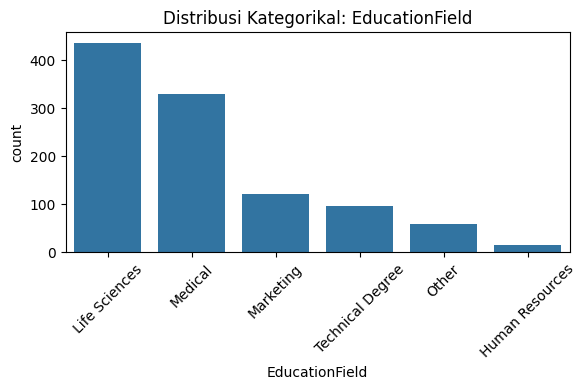

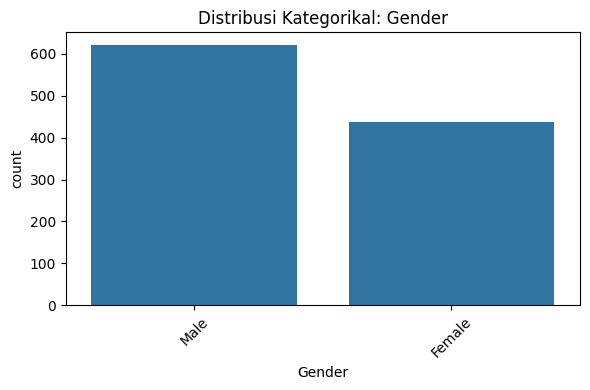

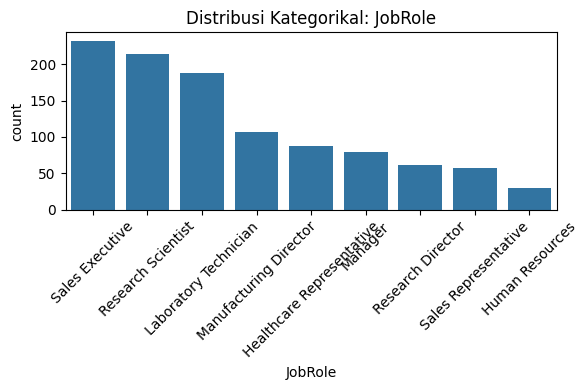

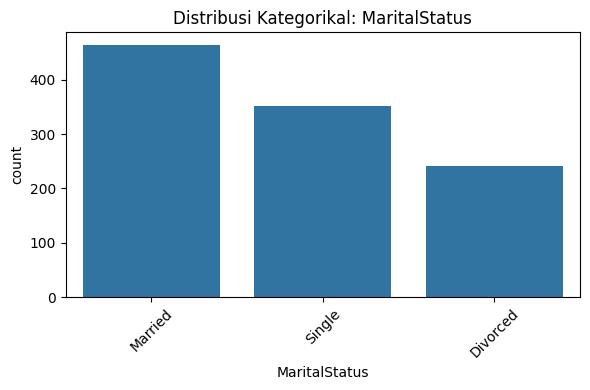

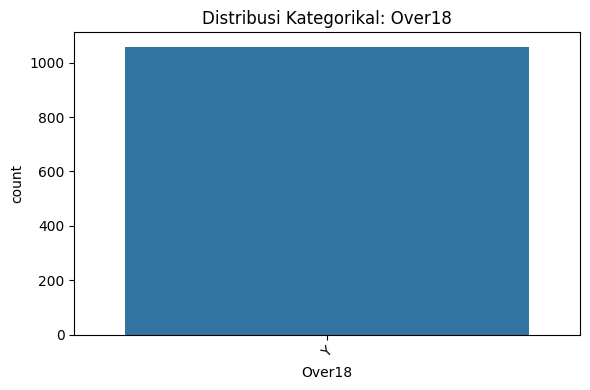

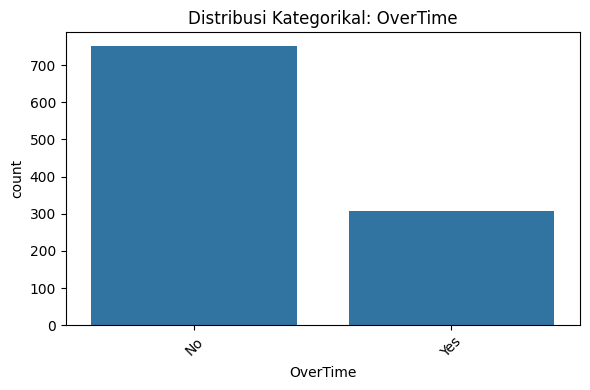


 Crosstab Kategorikal vs Attrition:


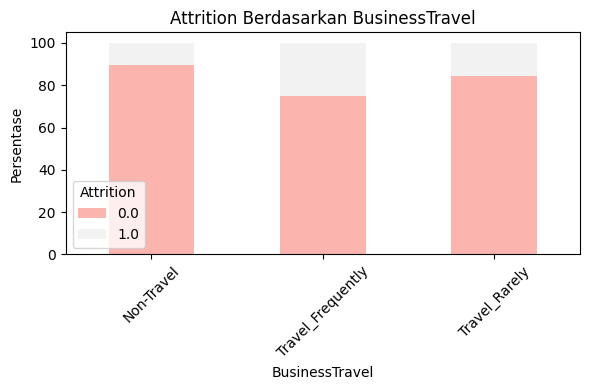

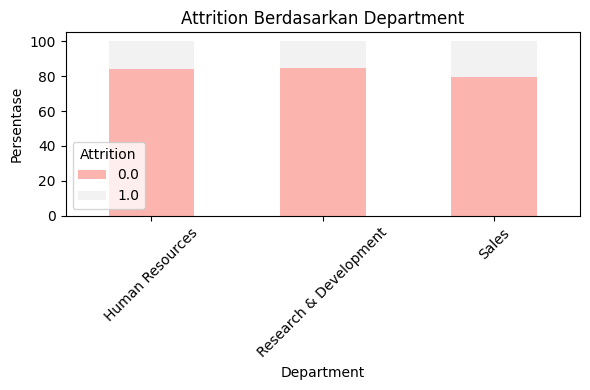

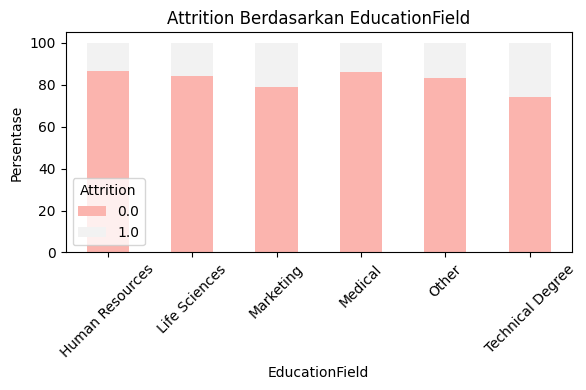

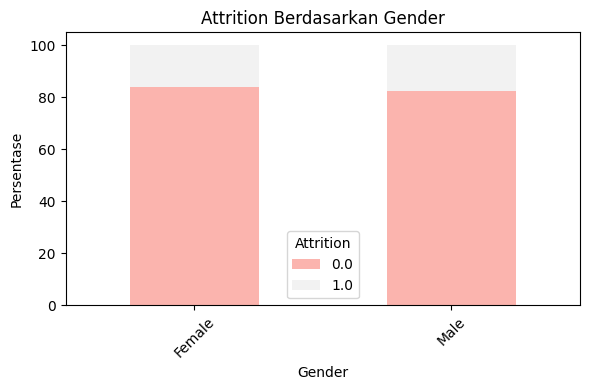

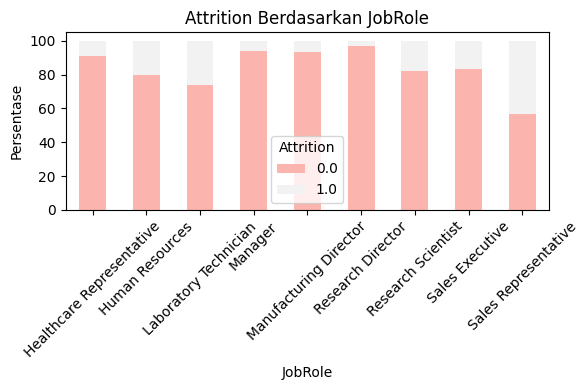

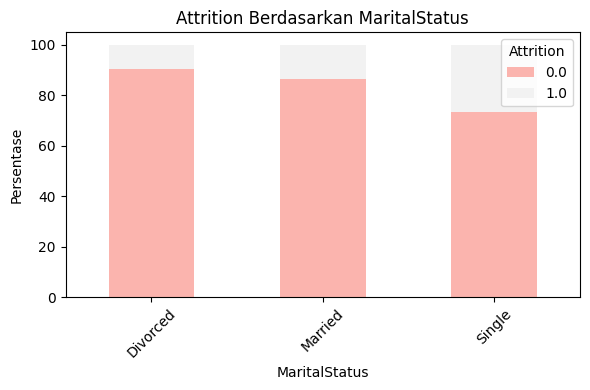

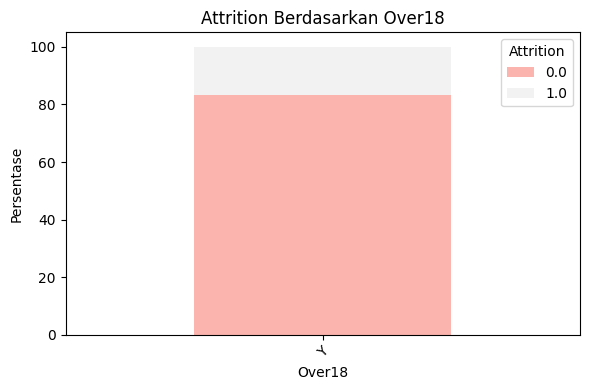

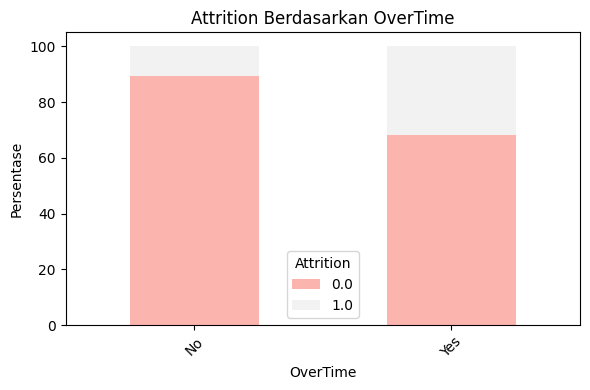

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

#  Distribusi fitur numerikal
print("\n Distribusi Numerikal:")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()
    plt.show()

#  Distribusi fitur kategorikal
print("\n Distribusi Kategorikal:")
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi Kategorikal: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#  Kategorikal vs Attrition
print("\n Crosstab Kategorikal vs Attrition:")
for col in categorical_cols:
    ct = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Pastel1')
    plt.title(f'Attrition Berdasarkan {col}')
    plt.ylabel('Persentase')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Penjelasan:
1. Jumlah data = Menampilkan jumlah baris data dalam dataset.
2. Kolom = Menampilkan nama kolom yang tersedia.
3. Jumlah nilai null = Menampilkan jumlah nilai yang hilang per kolom.
4. Statistik deskriptif = Menampilkan ringkasan statistik kolom numerik.
5. Lima Data Teratas = Menampilkan 5 baris pertama untuk melihat struktur data.
6. Visualisasi Kelas Attrition = Menunjukkan distribusi karyawan yang keluar dan tetap bertahan.
7. Visualisasi Fitur Numerik = Melihat distribusi nilai numerik pada dataset.

## Data Preparation / Preprocessing

In [7]:
# Tangani missing value pada kolom 'Attrition'
mode_attrition = df['Attrition'].mode()[0]
df['Attrition'] = df['Attrition'].fillna(mode_attrition)

# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Cek kolom numerik setelah encoding
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Korelasi Fitur Numerikal Setelah Encoding


 Korelasi Fitur Numerikal:


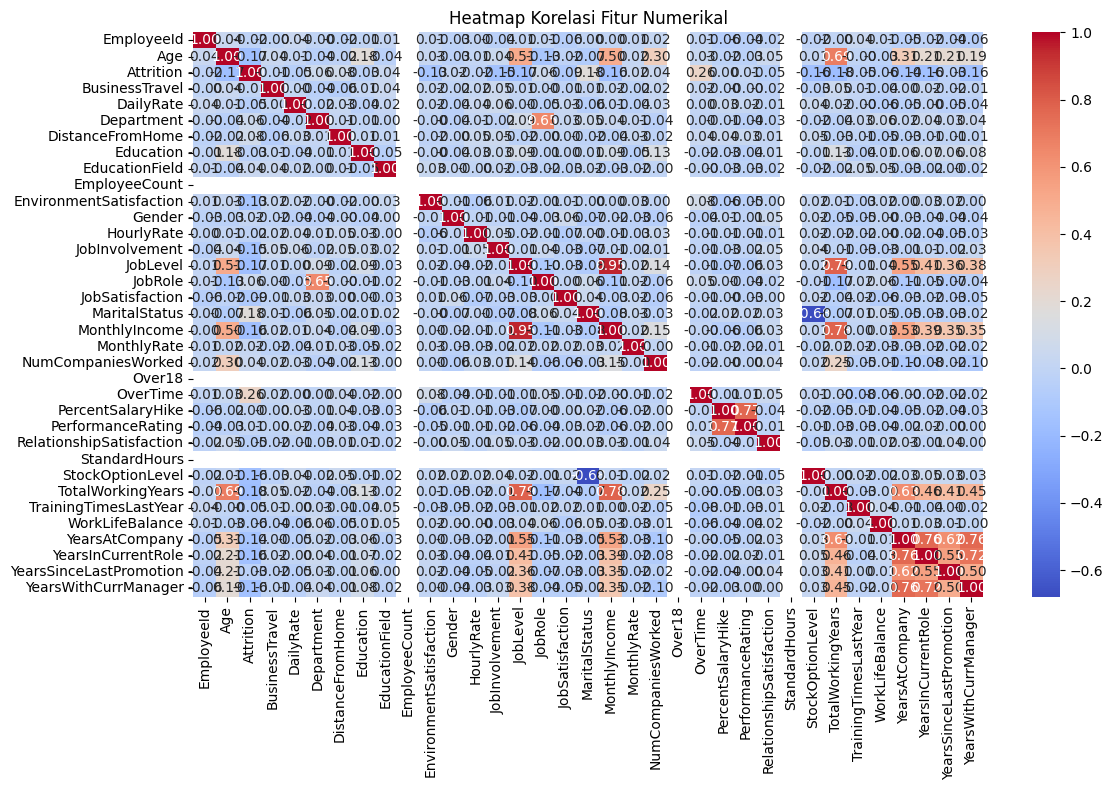

In [8]:
print("\n Korelasi Fitur Numerikal:")
plt.figure(figsize=(12, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerikal')
plt.tight_layout()
plt.show()

# Tentukan Fitur dan Target

In [9]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Simpan nama fitur
feature_names = X.columns.tolist()
os.makedirs("model", exist_ok=True)
joblib.dump(feature_names, "model/feature_names.pkl")

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [10]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Evaluation


 Evaluasi Model...

 Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       173
         1.0       0.79      0.49      0.60        39

    accuracy                           0.88       212
   macro avg       0.84      0.73      0.77       212
weighted avg       0.87      0.88      0.87       212


 Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       173
         1.0       1.00      0.15      0.27        39

    accuracy                           0.84       212
   macro avg       0.92      0.58      0.59       212
weighted avg       0.87      0.84      0.79       212


 Logistic Accuracy: 0.88
 Random Forest Accuracy: 0.84


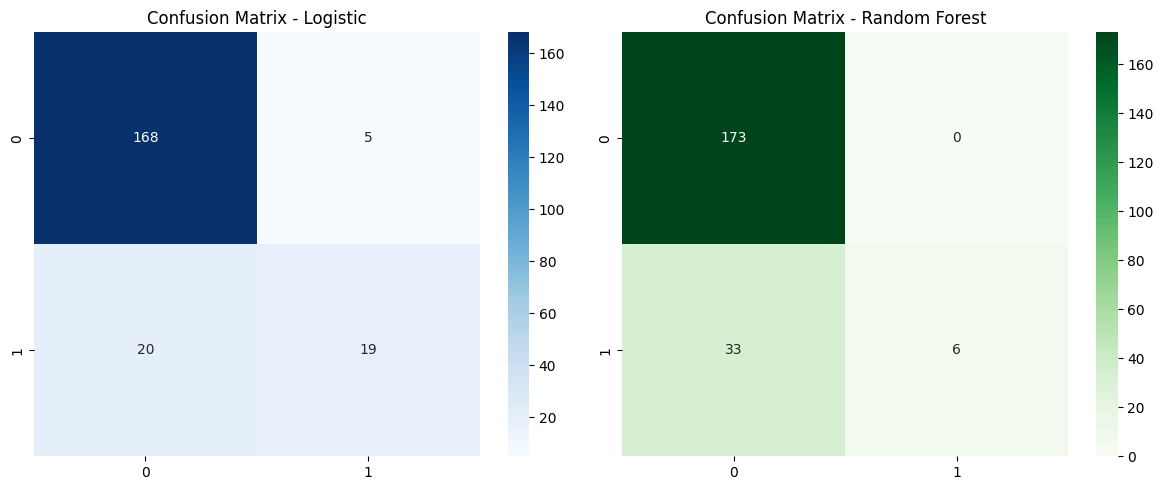

In [11]:
print("\n Evaluasi Model...")

y_pred_log = logistic_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("\n Random Forest:")
print(classification_report(y_test, y_pred_rf))

print(f"\n Logistic Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f" Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()

# Simpan Model

In [12]:
joblib.dump(rf_model, "model/model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(feature_names, "model/feature_names.pkl")
print("\n Model dan Scaler berhasil disimpan!")


 Model dan Scaler berhasil disimpan!


In [13]:
!pip freeze > requirements.txt